### Matplotlib 核心結構可以拆解為兩個重要的對象：
1. **Figure object**：
   - 整個畫布或圖表的容器，可以包含一個或多個子圖（Axes）。
   - 它相當於一張空白的畫布。
2. **Axes object**：
   - 每一個子圖是數據繪圖的核心部分，包括座標系、軸、標籤、圖表內容等。
   - 是真正承載圖表元素的對象。


### **2. Figure 與 Axes 的關係**
- 一個 **Figure** 可以包含多個 **Axes**，類似於在一張畫布上畫多個圖。
- **Axes** 是一個具體的子圖，是繪圖的基本單位。

___



Pandas `.plot()` 是基於 Matplotlib 的封裝函式。
```
plot(x=None, y=None, kind="xx", title=None, legend=True, rot=None, ...)  # rot 是旋轉刻度, kond 預設是 "line"
```

在 Pandas 資料框或序列上使用 plot() 時，它會調用 Matplotlib 來生成視覺化圖表。Pandas 提供了更高層級的 API，讓繪圖變得更加方便。雖然 Pandas 封裝了 Matplotlib 的功能，但它依賴於 Matplotlib 的後端進行圖表繪製。因此，還是需要安裝並導入 Matplotlib 才能使用 plot() 方法正常繪製圖表。

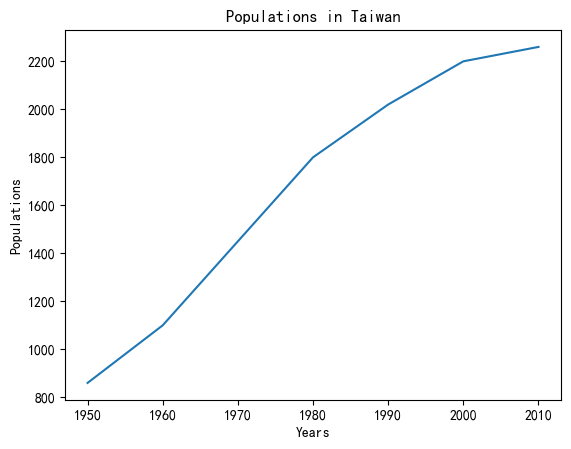

In [ ]:
import matplotlib.pyplot as plt # 仍需 import matplotlib.pyplot
import pandas as pd

# 使用 Series 繪製折線圖
populations = [860, 1100, 1450, 1800, 2020, 2200, 2260]
tw = pd.Series(populations, index=range(1950, 2011, 10))

tw.plot(title='Populations in Taiwan') # return Axes object。
plt.xlabel("Years") # 是 Matplotlib 的高層封裝函式，它會自動操作上一個由 Pandas 繪製的 Axes 對象
plt.ylabel("Populations")
plt.show() # 歷該 Figure 中的所有子圖(Axes)，並渲染它們。




,population
A,100
B,50
C,40
D,1500
E,400
F,800


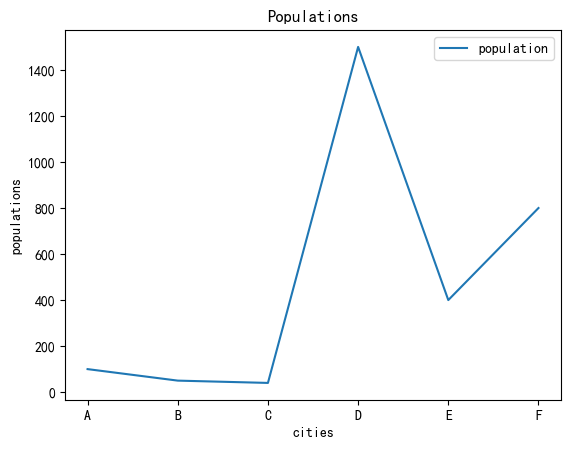

In [8]:
# 使用 DataFrame 繪製圖表
cities = {
    "population":[100, 50, 40, 1500, 400, 800],
    "town":["A", "B", "C", "D", "E", "F"]
}

df = pd.DataFrame(cities, columns=["population"], index=cities["town"])

df.plot(title="Populations") # DataFrame 的 index 是 x軸，columns 是 y軸
plt.xlabel("cities")
plt.ylabel("populations")
# plt.show()
df

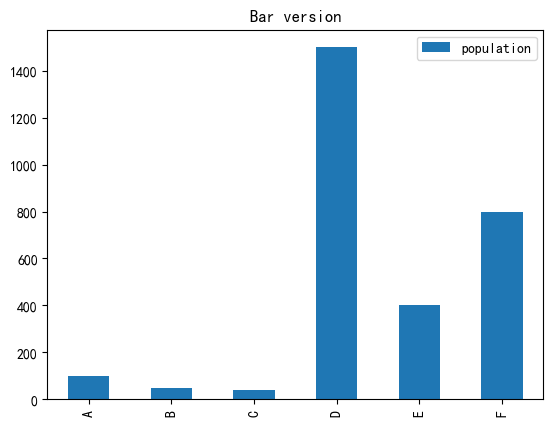

In [9]:
# kind = "bar"

df.plot(title="Bar version", kind="bar")
plt.show()

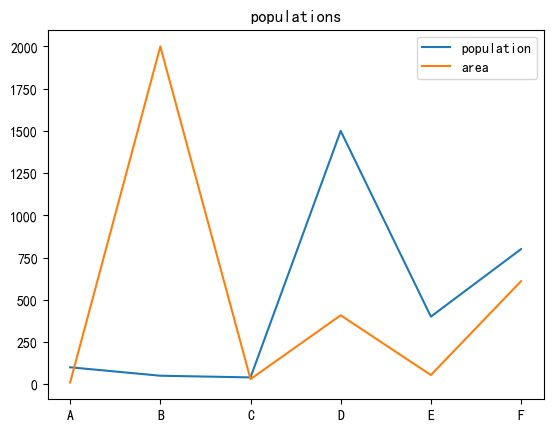

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

cities = {
    "population":[100, 50, 40, 1500, 400, 800],
    "town":["A", "B", "C", "D", "E", "F"],
    "area":[10, 2000, 30, 408, 54, 610]
}

df = pd.DataFrame(cities, columns=["population", "area"], index=cities["town"])

df.plot(title="populations")
plt.show()

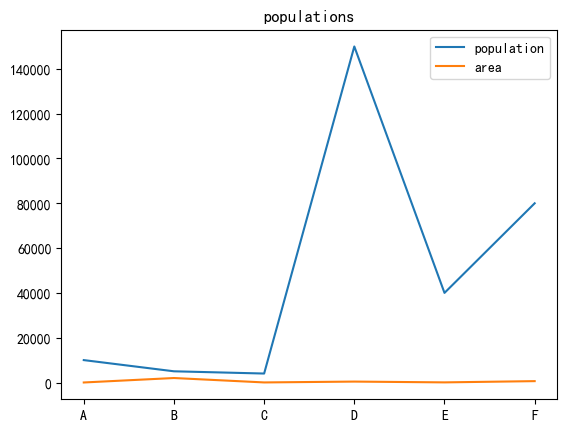

In [4]:
# 若兩個圖的數值差距太大，則會無法正常顯示

cities = {
    "population":[10000, 5000, 4000, 150000, 40000, 80000],
    "town":["A", "B", "C", "D", "E", "F"],
    "area":[10, 2000, 30, 408, 54, 610]
}

df = pd.DataFrame(cities, columns=["population", "area"], index=cities["town"])

df.plot(title="populations")
plt.show()

### 若想解決上述問題，最好的方法是「增加數值軸」
`subplots()`可以在一個圖表內顯示多組不同軸的數據。

```
fig, ax = subplots() 
```
```
ax2 = ax.twinx() # 創建一個共享 X 軸的新 Axes 對象
```

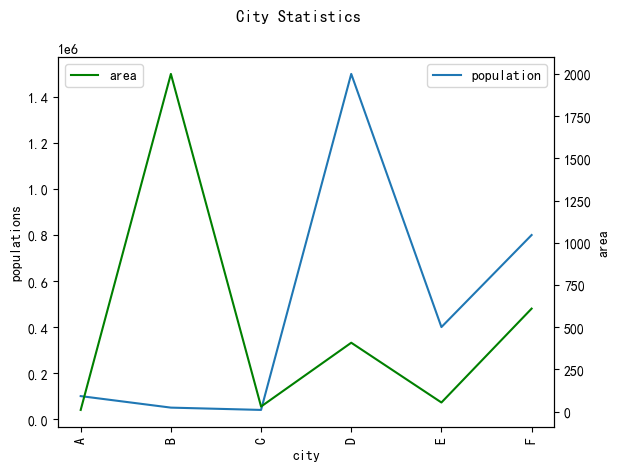

In [13]:
cities = {
    "population":[100000, 50000, 40000, 1500000, 400000, 800000],
    "town":["A", "B", "C", "D", "E", "F"],
    "area":[10, 2000, 30, 408, 54, 610]
}

df = pd.DataFrame(cities, columns=["population", "area"], index=cities["town"])

fig, ax = plt.subplots()
fig.suptitle("City Statistics")
ax.set_ylabel("populations")
ax.set_xlabel("city")
ax2 = ax.twinx() # 創建一個新的 Axes，與當前的 Axes 共用相同的 X 軸，但有自己的 Y 軸。
ax2.set_ylabel("area") 

df['population'].plot(ax=ax, rot=90) # 將 population 數據繪製在指定的 Axes（ax）上。rot=90 用於旋轉 X 軸標籤，使其垂直顯示。
df["area"].plot(ax=ax2, style="g") # style="g" 設置線條的樣式，g 代表綠色（green）

# 為各自的 Axes 添加圖例 (legend)
ax.legend(loc=1) # loc=1：右上角
ax2.legend(loc=2) # loc=2：左上角

plt.show()

#### 上述左側y軸是用科學記號，可以使用`ticklabel_format()`調整
tick：指刻度（軸上的分隔標記）。

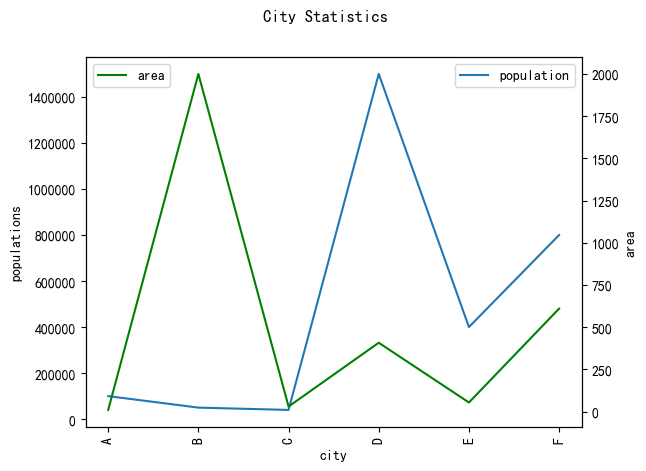

In [ ]:
cities = {
    "population":[100000, 50000, 40000, 1500000, 400000, 800000],
    "town":["A", "B", "C", "D", "E", "F"],
    "area":[10, 2000, 30, 408, 54, 610]
}

df = pd.DataFrame(cities, columns=["population", "area"], index=cities["town"])

fig, ax = plt.subplots()
fig.suptitle("City Statistics")
ax.set_ylabel("populations")
ax.set_xlabel("city")
ax2 = ax.twinx() 
ax2.set_ylabel("area") 
ax.ticklabel_format(style='plain') # 普通數字, "sci": 科學記號

df['population'].plot(ax=ax, rot=90) 
df["area"].plot(ax=ax2, style="g") 

ax.legend(loc=1) 
ax2.legend(loc=2) 

plt.show()


### 使用 Series 繪製圓餅圖
`plot.pie(x, optional)  `

Apple     10
Banana    20
Grapes    50
Name: Fruits, dtype: int64

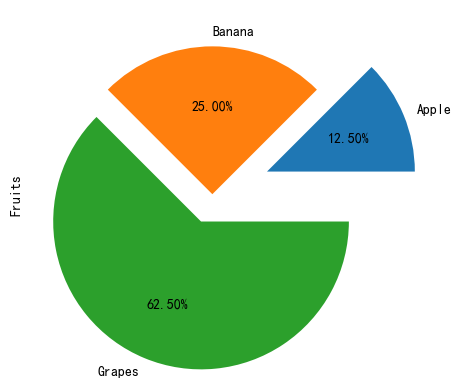

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

fruits = ["Apple", "Banana", "Grapes"]
s = pd.Series([10, 20, 50], index=fruits, name='Fruits')
explode = [0.4, 0, 0.2] # 分離程度
s.plot.pie(explode=explode, autopct="%2.2f%%") # 整數1位 小數2位
s
# plt.show()
